In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd
import matplotlib as m
from scipy.special import logsumexp

# TDMA Solver

In [4]:
def solver_TDMA(a,b,c,d):
    '''b---> diagonal numpy array
        a--> lower triangle
        c--> upper triangle
        d--> matrix at right'''
    n=b.shape[0]
    ac,bc,cc,dc=map(np.array,(a,b,c,d)) #creating copy of elements
    # FoRWARD elimination
    for i in range(1,n):
        m=ac[i-1]/bc[i-1]
        bc[i]=bc[i]-m*cc[i-1]
        dc[i]=dc[i]-m*dc[i-1]
    #Backward substitution
    x=np.zeros((n,))
    for i in range(n-1,-1,-1):
        if (i==(n-1)):
            x[n-1]=dc[n-1]/bc[n-1]
        else:
            x[i]=(dc[i]-cc[i]*x[i+1])/bc[i]

    return x

# Project 3

## Alternate Direct Implicit

In [3]:
#geometry and number of nodes
nx=40
ny=50
width=0.3
lenght=0.2
dx=lenght/(nx-1)
dy=width/(ny-1)
r=pow(dx,2)/pow(dy,2)
#BC and initial condition
T_left=20
T_right=20
T_up=100
T_down=20
T_initial=0

#initializing
T=np.ones((ny,nx))*T_initial
# j-->nx; i_>ny
T[0,:]=T_up
T[:,0]=T_left
T[:,nx-1]=T_right
T[ny-1,:]=T_down
df=pd.DataFrame(T)

T_old=T.copy()
error=1.0
itter=0

while(error>1e-6):
    # y sweep
    b=np.ones((ny-2,))*(-2.0)*(1+r)
    a=np.ones((ny-3,))*r
    c=np.ones((ny-3,))*r
    d=np.zeros((ny-2,))

    for j in range(1,nx-1):
        #d[0:ny-2]=(-1)*(T[0:ny-2,j]+T[2:ny,j])
        d[0:ny-2]=(-1)*(T[1:ny-1,j-1]+T[1:ny-1,j+1])
        d[0]=d[0]-r*T[0,j]#Top
        d[ny-3]=d[ny-3]-r*T[ny-1,j]
        T[1:ny-1,j]=solver_TDMA(a,b,c,d) 
      
    #x-sweep
    del(a,b,c,d)
    b=np.ones((nx-2,))*(-2.0)*(1+r)
    a=np.ones((nx-3,))*r
    c=np.ones((nx-3,))*r
    d=np.zeros((nx-2,))
    for i in range(1,ny-1):
        d[0:nx-2]=(-1)*(T[i+1,1:nx-1]+T[i-1,1:nx-1])
        d[0]=d[0]-r*T[i,0]#left
        d[nx-3]=d[nx-3]-r*T[i,nx-1]
        T[i,1:nx-1]=solver_TDMA(a,b,c,d)  
    del(a,b,c,d)
    error=np.amax(np.abs(T-T_old))
    itter=itter+1
    T_old=T.copy()





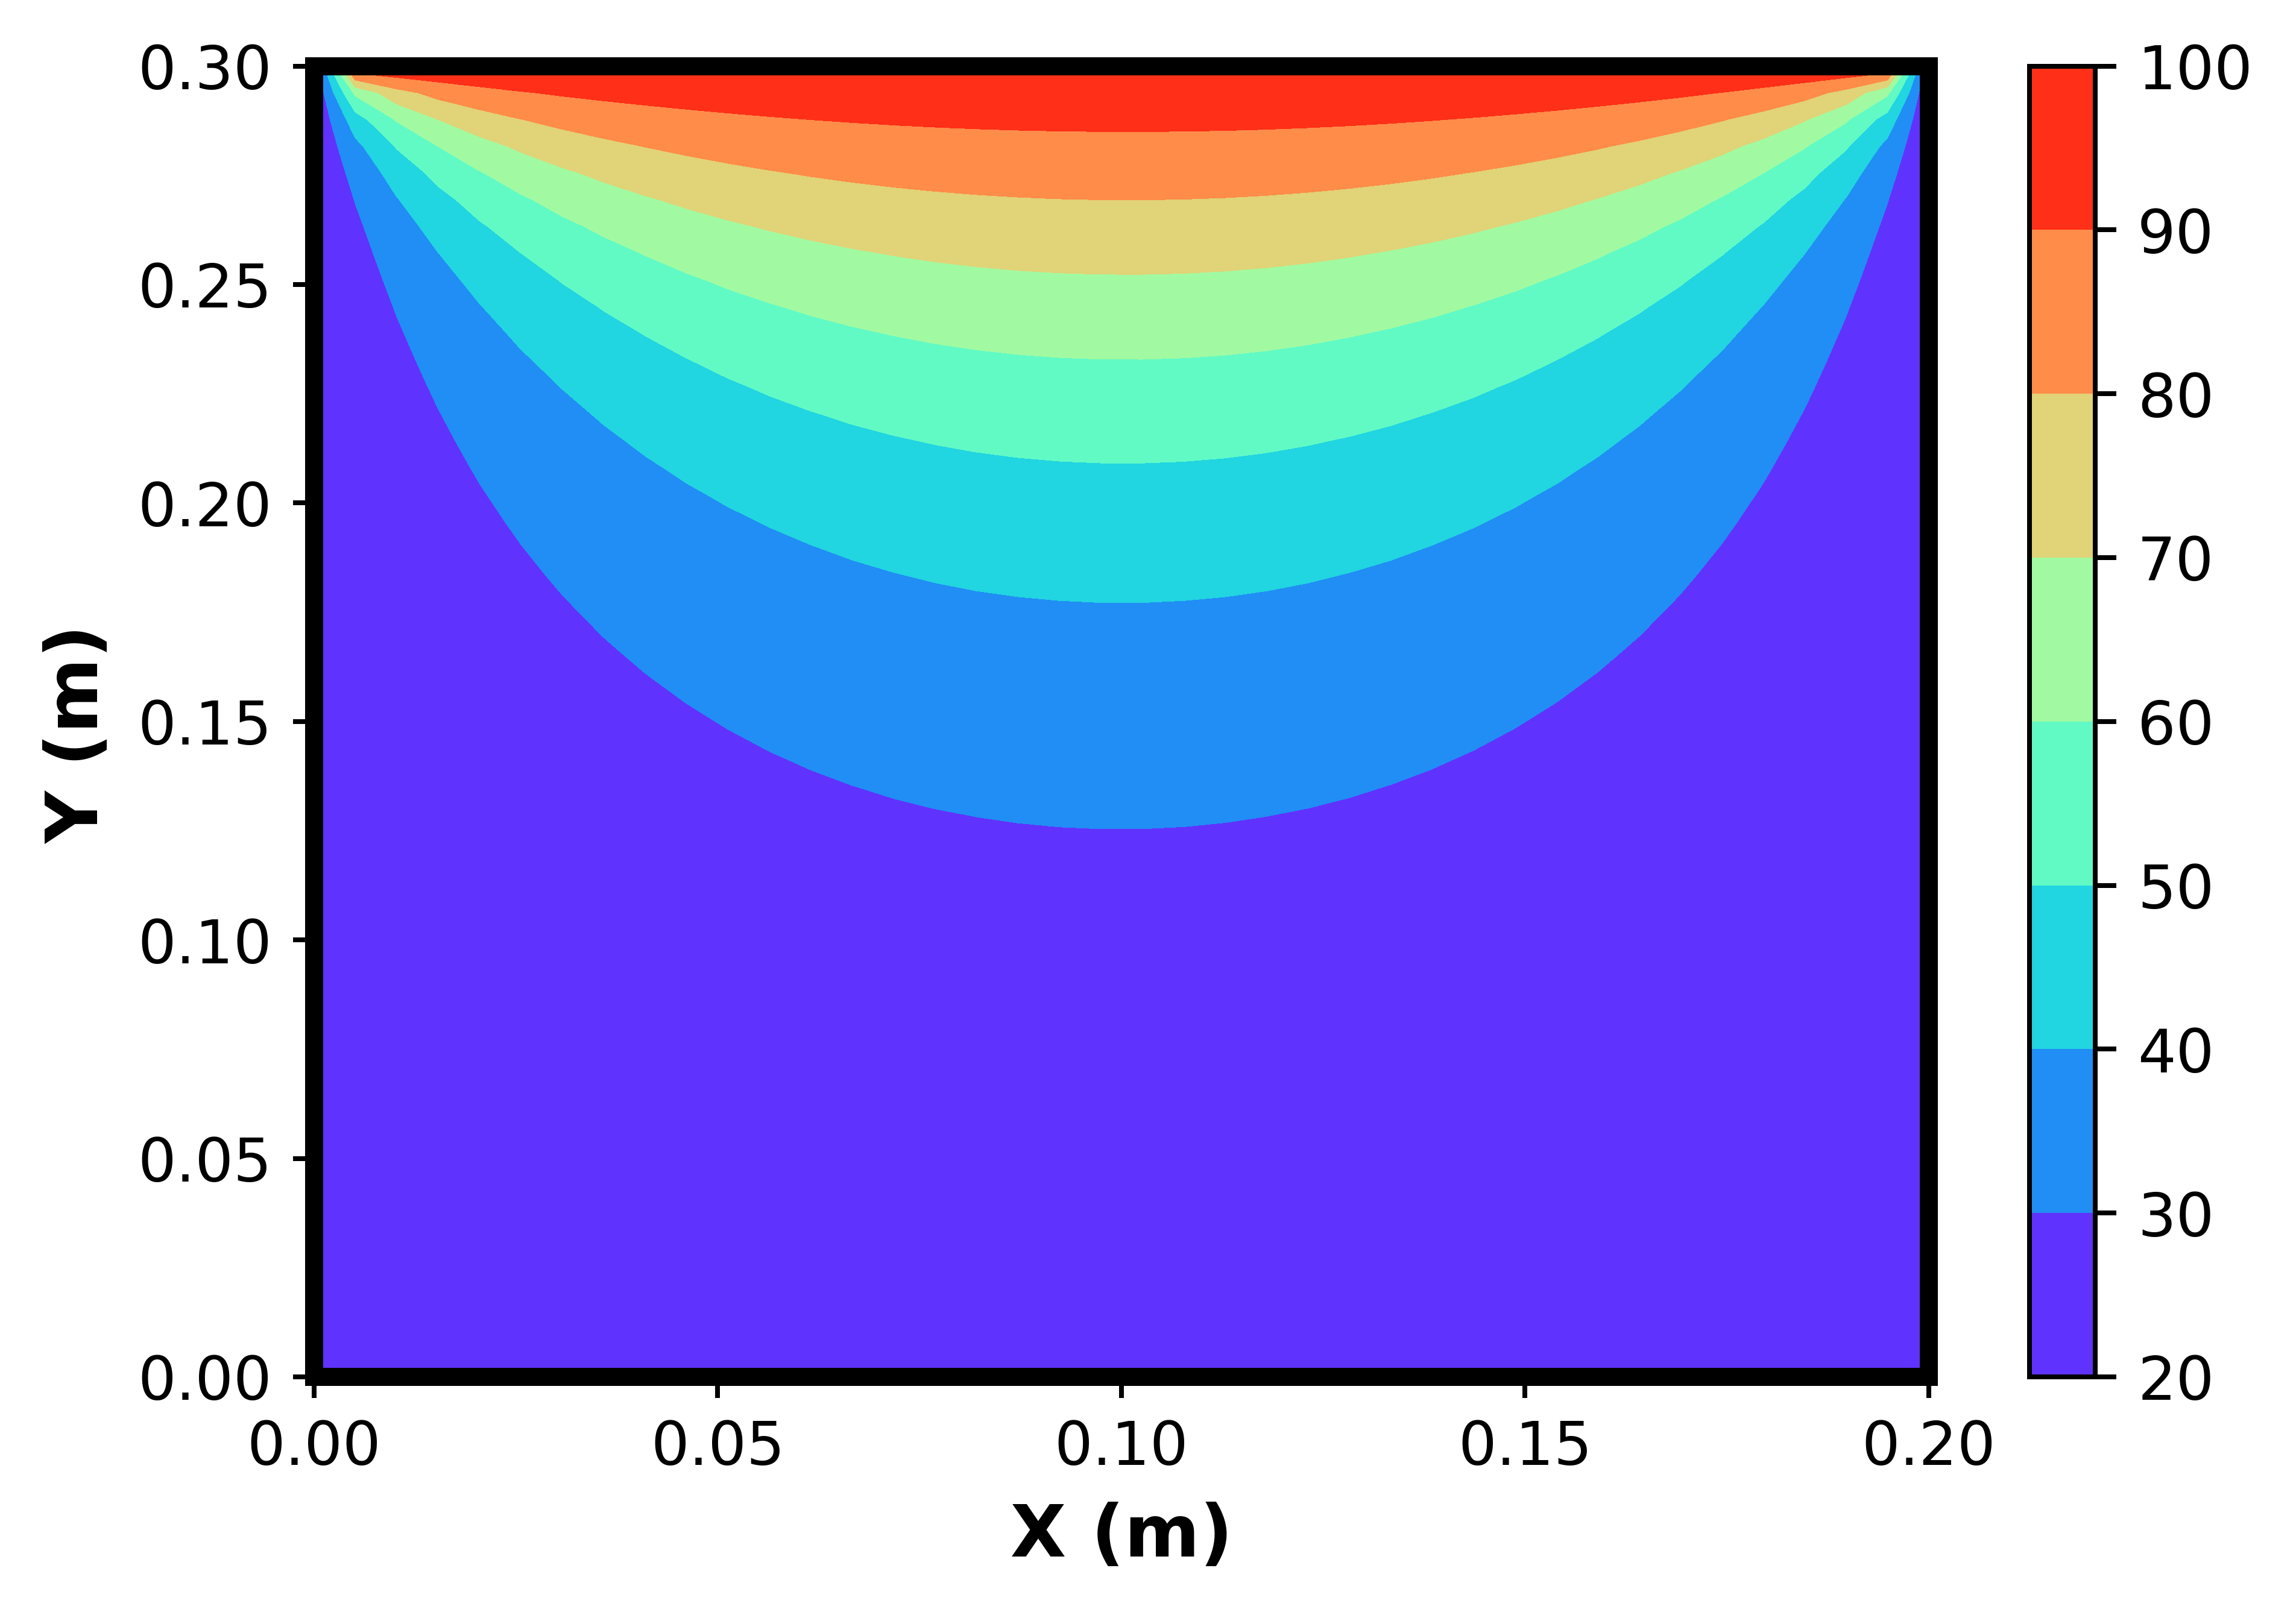

In [4]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,lenght,5))
x,y = np.meshgrid(np.linspace(0,lenght, nx), np.linspace(width,0, ny))
plt.contourf(x,y,T, 8, alpha=1, cmap='rainbow')
plt.colorbar()

## Gauss seidel point-wise

In [5]:
#geometry and number of nodes
nx=50
ny=50
width=0.3
lenght=0.2
dx=lenght/(nx-1)
dy=width/(ny-1)
r=pow(dx,2)/pow(dy,2)
#BC and initial condition
T_left=20
T_right=20
T_up=100
T_down=20
T_initial=40

#initializing
T=np.ones((ny,nx))*T_initial
# j-->nx; i_>ny
T[0,:]=T_up
T[:,0]=T_left
T[:,nx-1]=T_right
T[ny-1,:]=T_down
df=pd.DataFrame(T)

T_old=T.copy()
error=1.0
itter=0
l=1.5 # weighting factor
while(error>1e-6):
    for i in range(1,ny-1):
        for j in range(1,nx-1):
            T[i,j]=l*((T[i,j+1]+T[i,j-1])/(pow(dx,2)) + (T[i+1,j]+T[i-1,j])/(pow(dy,2)))/(2*(pow(1/dx,2)+pow(1/dy,2)))+(1-l)*T[i,j]
            '''T[i,j]=(T[i,j+1]+T[i,j-1])/(pow(dx,2)) + (T[i+1,j]+T[i-1,j])/(pow(dy,2))
            T[i,j]=T[i,j]/(2*(pow(1/dx,2)+pow(1/dy,2)))'''

    error=np.amax(np.abs(T-T_old))
    itter=itter+1
    T_old=T.copy()
itter

981

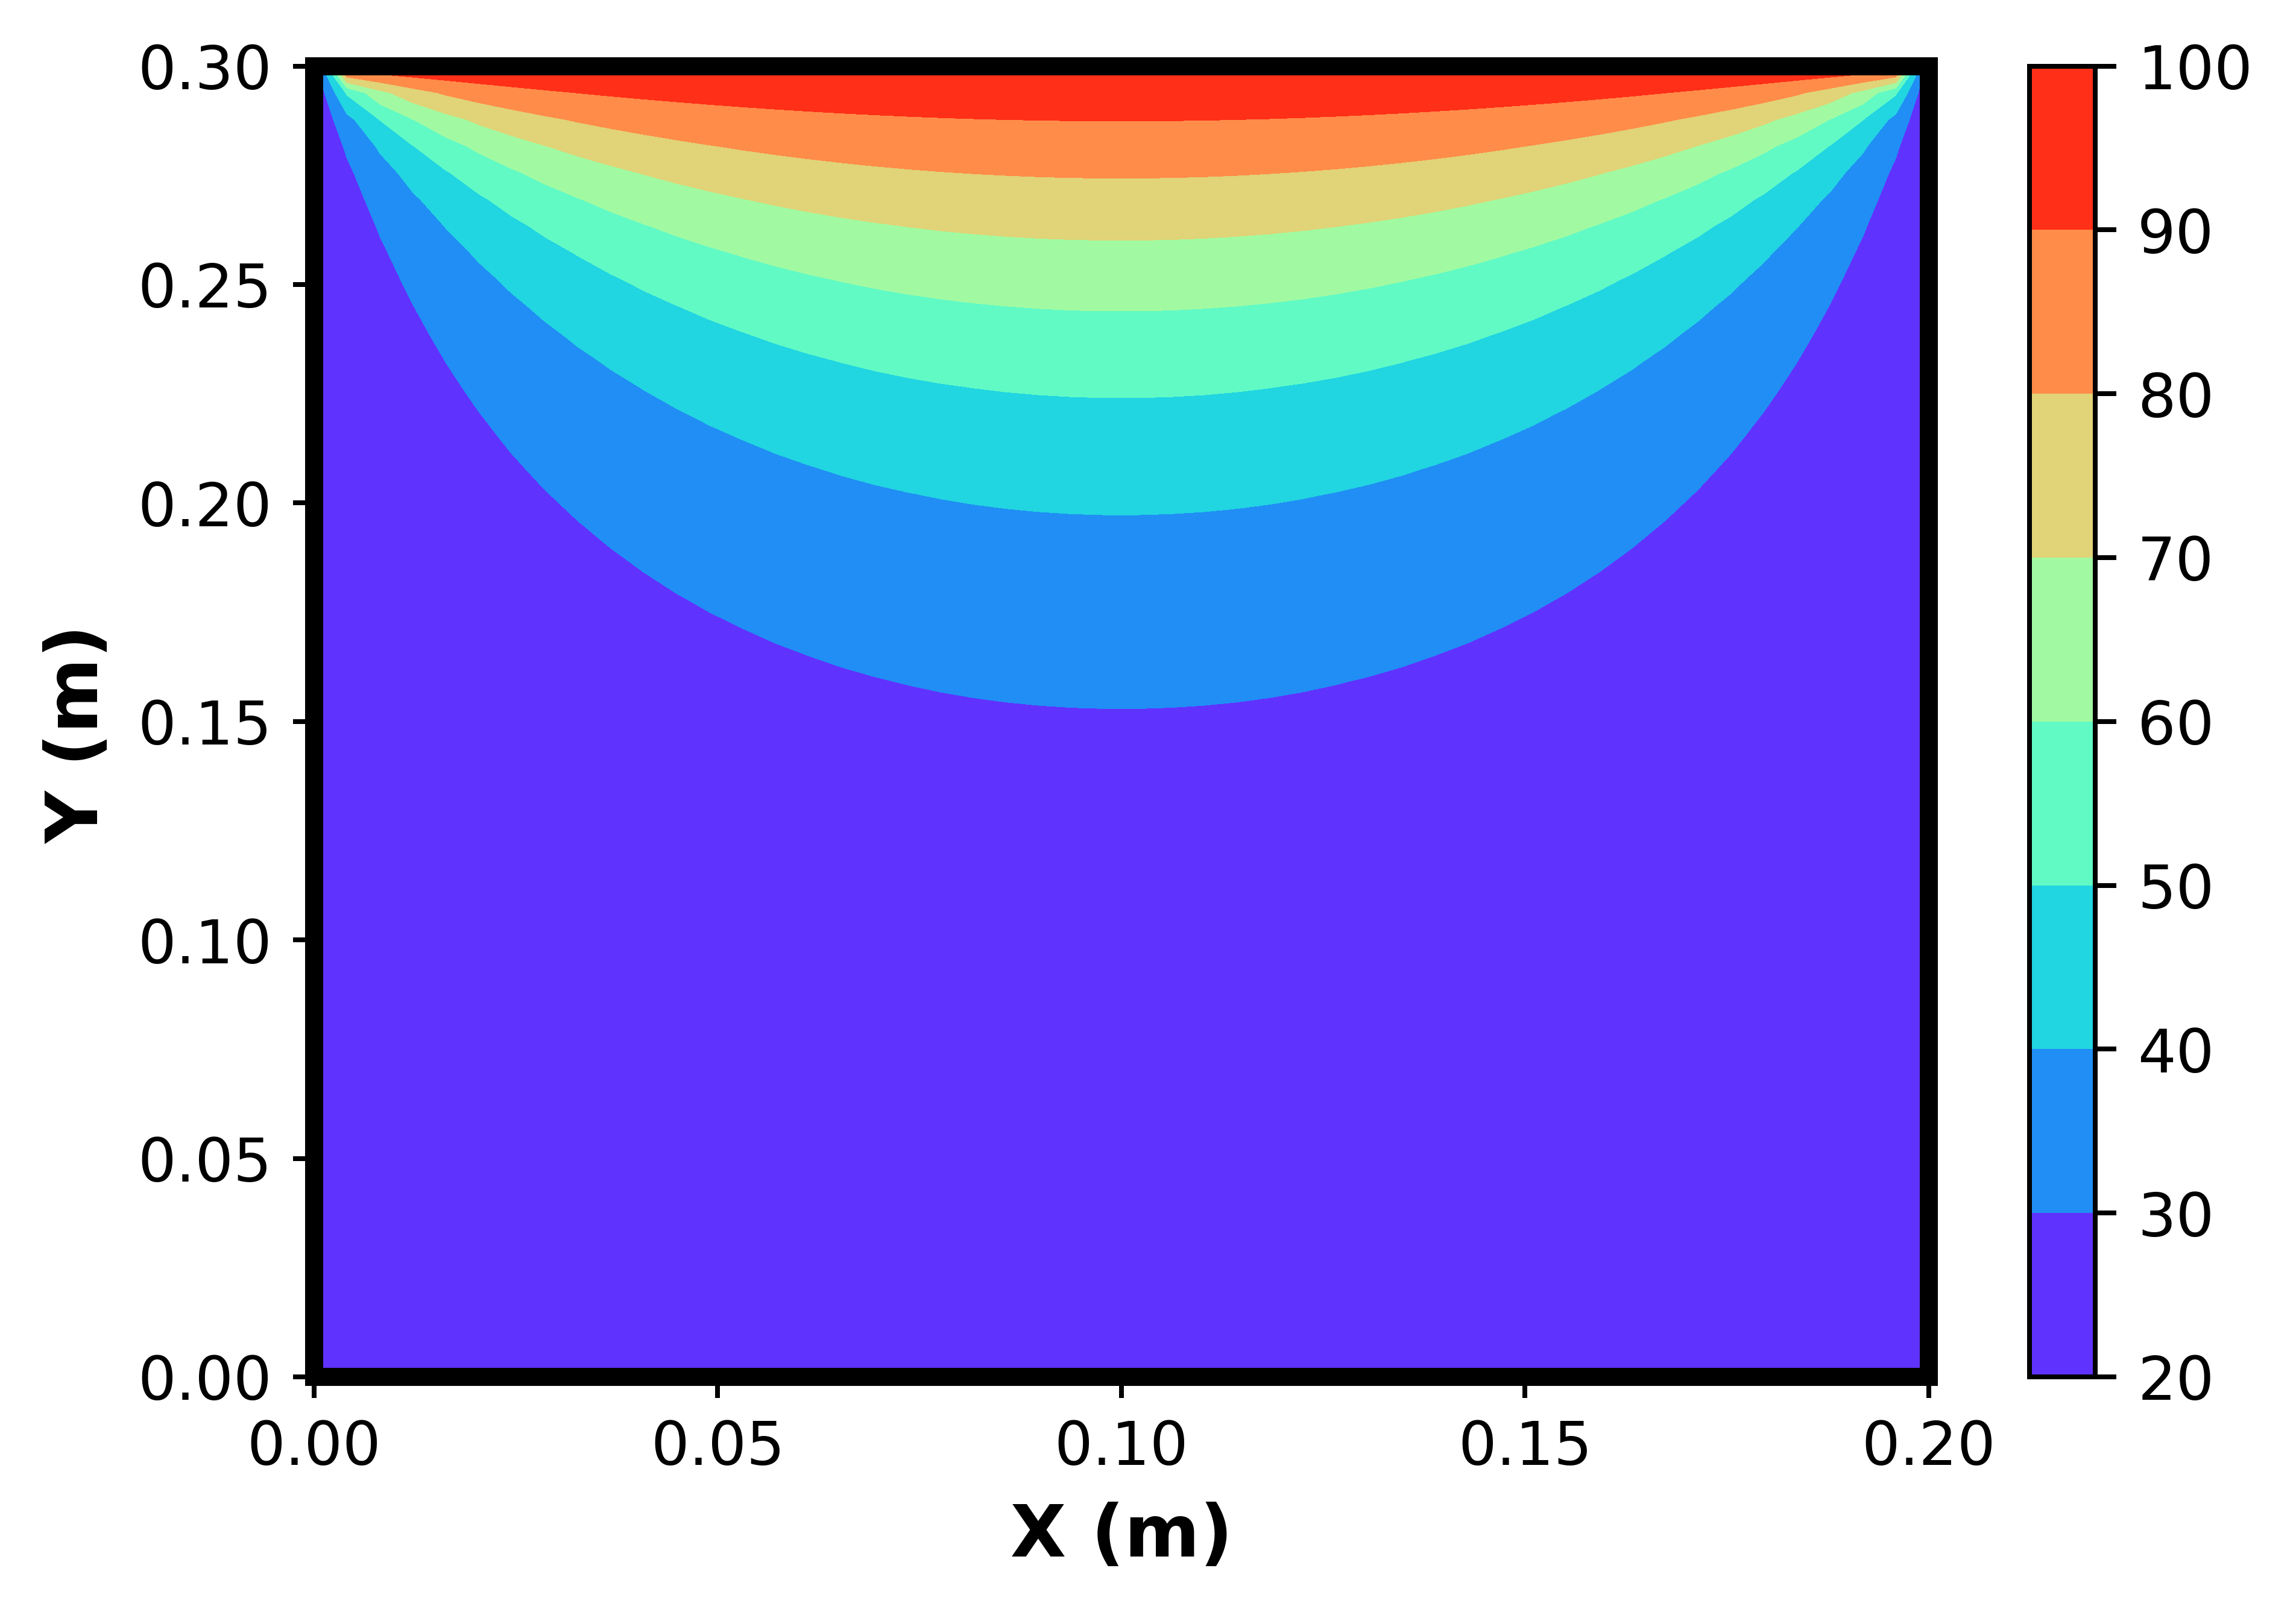

In [6]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,lenght,5))
x,y = np.meshgrid(np.linspace(0,lenght, nx), np.linspace(width,0, ny))
plt.contourf(x,y,T, 8, alpha=1, cmap='rainbow')
plt.colorbar()

## Analytical solution

In [ ]:
#analytical solution
X, Y = np.meshgrid(np.linspace(0,lenght,200),np.linspace(width,0,200))
T_analytical = sum(((np.sinh(n*np.pi*Y/lenght)/np.sinh(np.pi*n*width/lenght))*(2/(n*np.pi))*(pow(-1,n+1)+1)*np.sin(n*np.pi*X/lenght)) for n in range (1,150))
ak=1

In [ ]:
#analytical solution
import warnings
X, Y = np.meshgrid(np.linspace(0,lenght,200,dtype=np.longdouble),np.linspace(width,0,200,dtype=np.longdouble))
warnings.filterwarnings('ignore')
T_analytical = sum(((np.exp(logsumexp(n*np.pi*Y/lenght)-logsumexp(-n*np.pi*Y/lenght),dtype='longdouble')/np.exp(logsumexp(np.pi*n*width/lenght)-logsumexp(-np.pi*n*width/lenght),dtype='longdouble'))*(2/(n*np.pi))*(pow(-1,n+1)+1)*np.sin(n*np.pi*X/lenght)) for n in range (1,250))
ak=1

In [6]:
lenght=0.2
width=0.3
X, Y = np.meshgrid(np.linspace(0,lenght,200),np.linspace(width,0,200))
X=X.astype('float128')
X.dtype

dtype('float128')

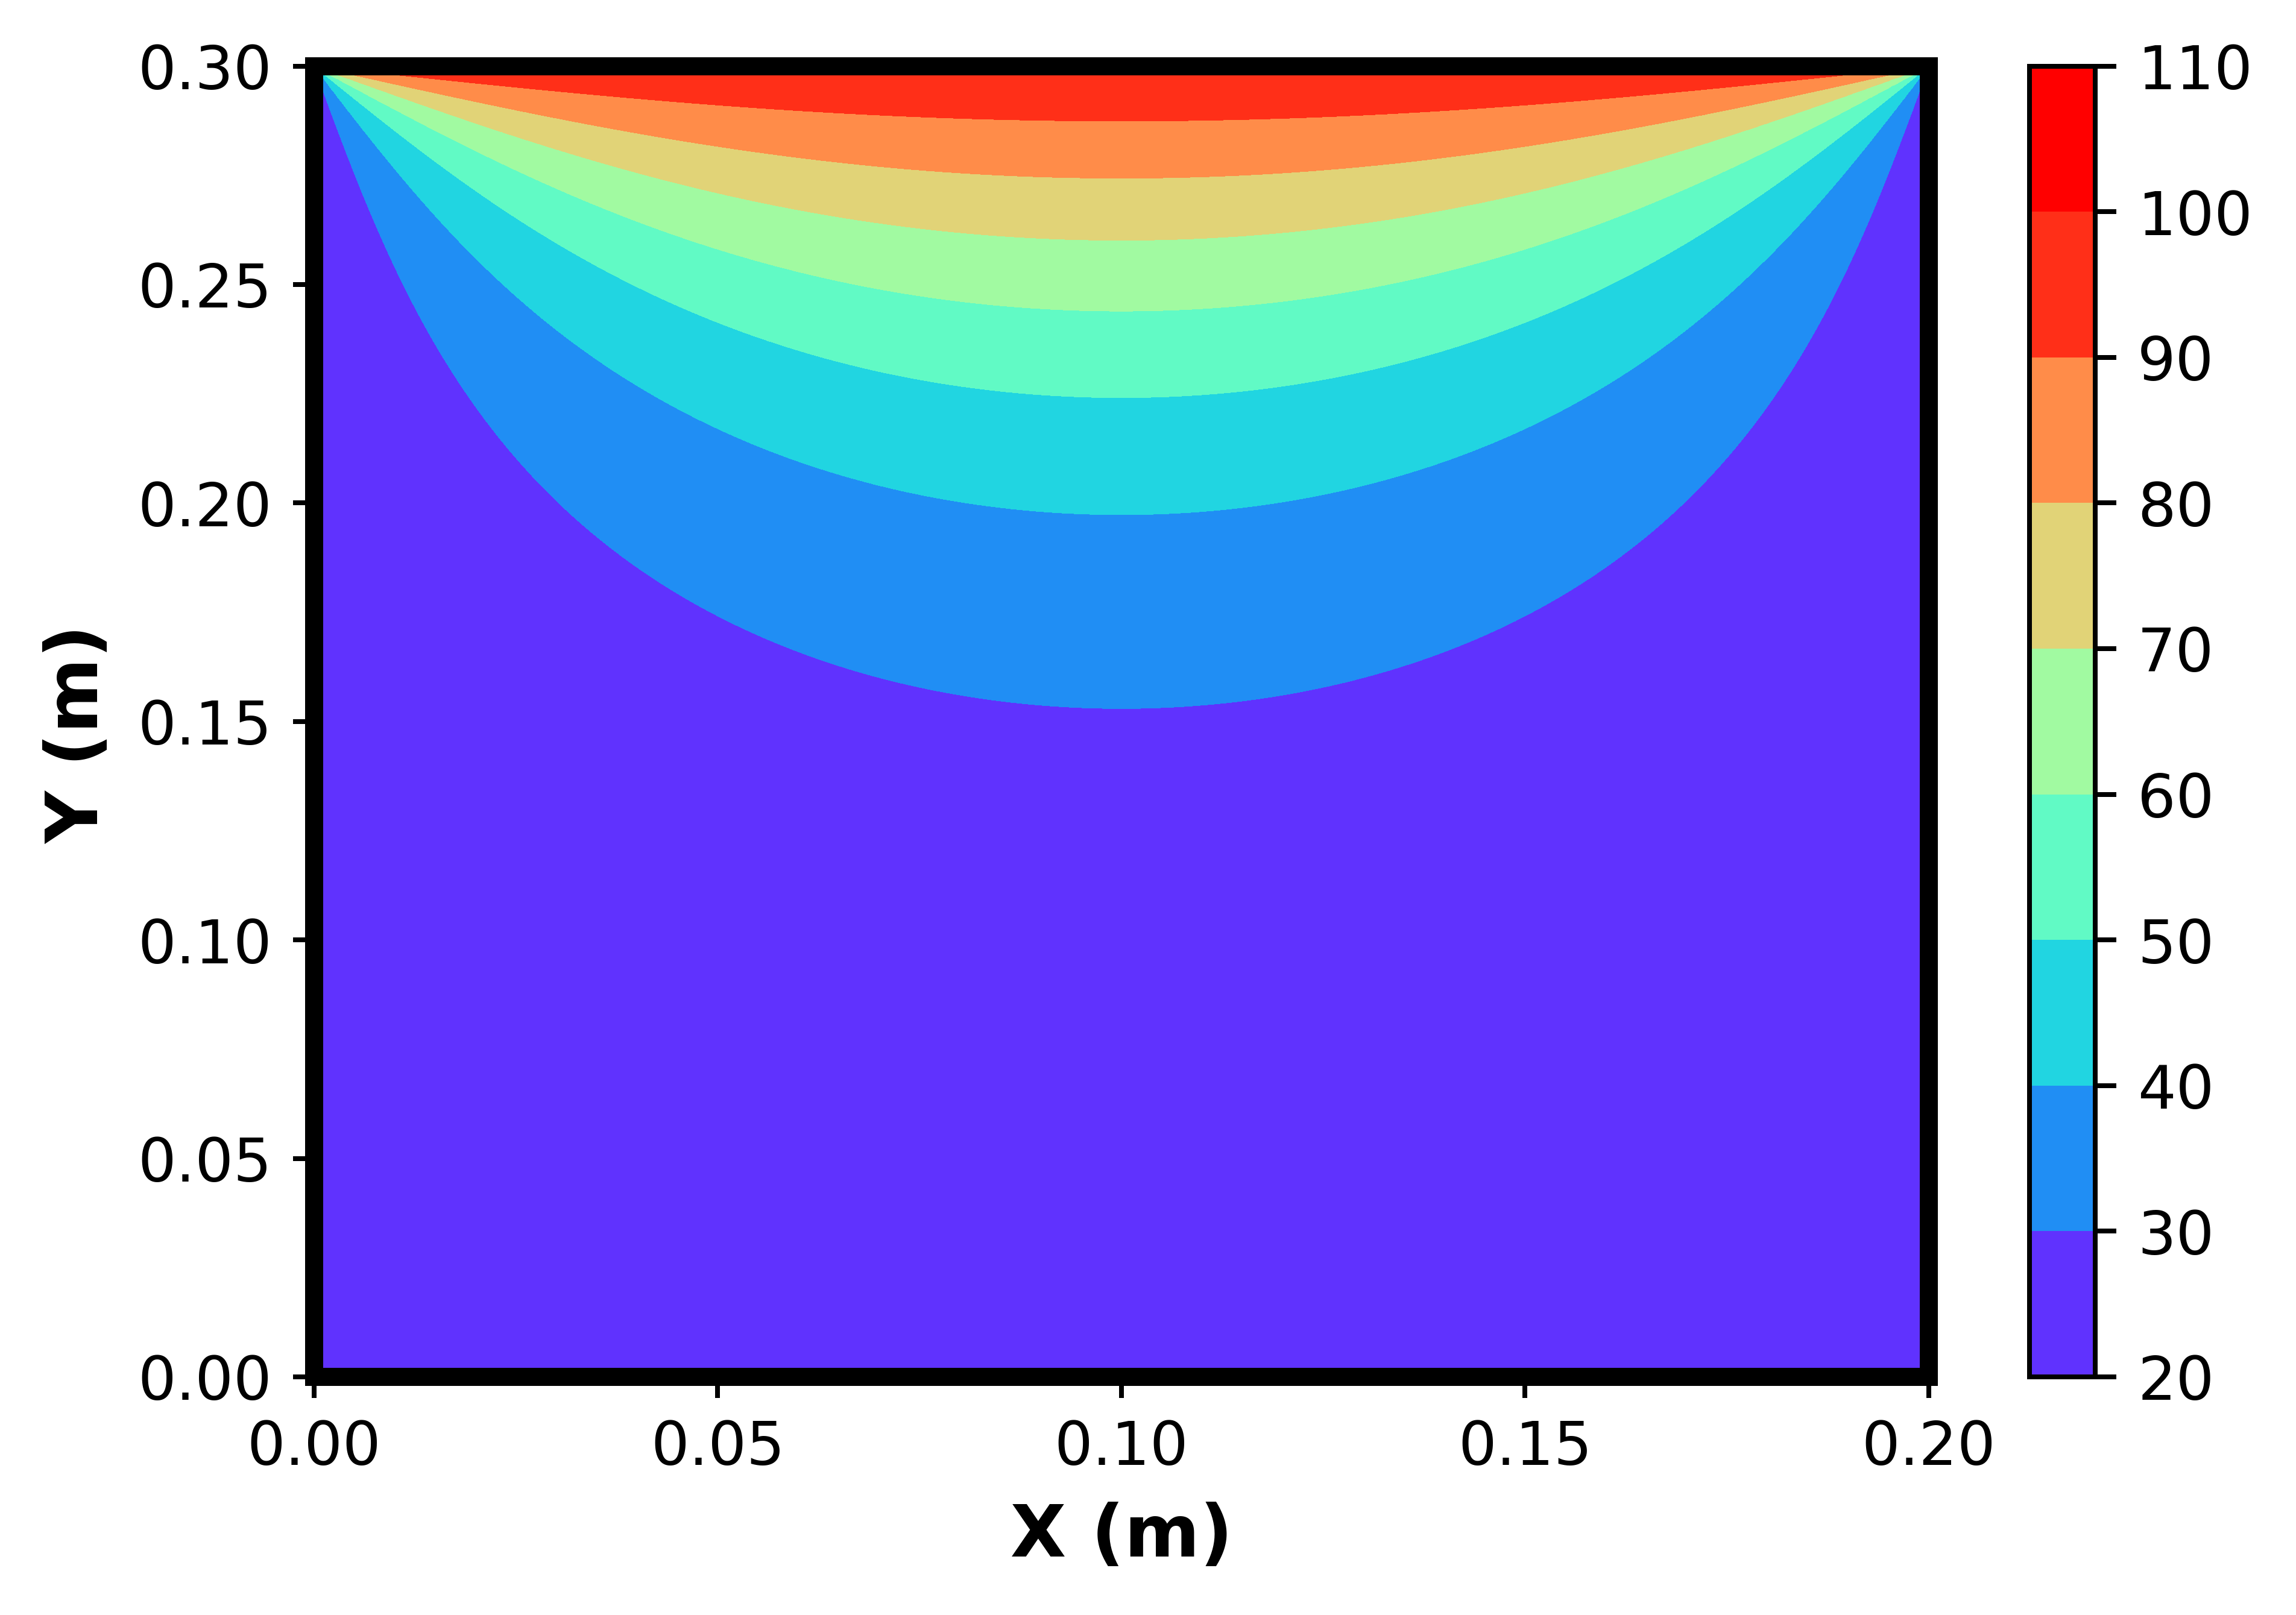

In [ ]:
plt.figure(dpi=720)
plt.setp(plt.axes().spines.values(), linewidth=3)
plt.xlabel(' X (m) ',fontsize=12,fontweight='bold')
plt.ylabel('Y (m) ',fontsize=12,fontweight='bold')
plt.xticks(np.linspace(0,lenght,5))
if ak==1:
    T_analytical=T_analytical*(100-20) + 20 
    ak=ak+1
plt.contourf(X,Y,T_analytical, 8, alpha=1, cmap='rainbow',vmin=20,vmax=100)
plt.clim(20,100)
plt.colorbar()